# 分类问题
数据集：手体字母的分类识别,根据写入字母的特征信息（如字母的宽度、高度、边际等）去判断哪一种字母。

该数据集包含2万个观测和17个变量，其中变量letter为因变量，具体的值是20个英文字母。


关于SVM算法的调用：

线性可分SVM、近似线性可分SVM  --  from sklearn.svm import LinearSVC

非线性可分SVM            --  from sklearn.svm import SVC

线性SVM回归             --  from sklearn.svm import LinearSVR

非线性SVM回归            --  from sklearn.svm import SVR

In [69]:
# 导入第三方模块
import pandas as pd
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn import model_selection
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [70]:
# 读取外部数据
letters = pd.read_csv(r'.\letterdata.csv')
# 数据前5行
letters.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [71]:
# 将数据拆分为训练集和测试集
predictors = letters.columns[1:]
X_train,X_test,y_train,y_test = model_selection.train_test_split(letters[predictors], 
                                                                 letters.letter, 
                                                                 test_size = 0.25, 
                                                                 random_state = 1234)

首先用线性可分SVM模型，由于该模型收到惩罚系数C的影响，故用交叉验证的方法。

In [8]:
# 使用网格搜索法，选择线性可分SVM“类”中的最佳C值
C=[0.05,0.1,0.5,1,2,5]
parameters = {'C':C}
grid_linear_svc = model_selection.GridSearchCV(estimator = LinearSVC(),
                                               param_grid = parameters,
                                               scoring='accuracy',
                                               cv=5,  # 5折交叉验证
                                               verbose =1)
# 模型在训练数据集上的拟合
grid_linear_svc.fit(X_train,y_train)
# 返回交叉验证后的最佳参数值
grid_linear_svc.best_params_, grid_linear_svc.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 22.8min finished


({'C': 0.1}, 0.6914)

In [87]:
# 模型在测试集上的预测
pred_linear_svc = grid_linear_svc.predict(X_test)  # 默认用最佳参数值c=0.1
# 模型的预测准确率
metrics.accuracy_score(y_test, pred_linear_svc)

0.7156

结论：经过5重交叉验证，发现最佳的惩罚系数C=0.1，模型在训练集的平均准确率只有69.2%，同时，其在测试数据集的预测准确率也不足72%，说明线性可分SVM模型并不太适合该数据集的拟合和预测。接下来使用SVM模型对该数据集进行重新建模。

## 模型创建

In [26]:
# 使用网格搜索法，选择非线性SVM“类”中的最佳C值
kernel=['rbf','linear','poly','sigmoid']  # 分别为径向基核函数、线性核函数、多项式核函数、sigmoid核函数
C=[0.1,0.5,1,2,5] # 惩罚系数
parameters = {'kernel':kernel,'C':C}
grid_svc = model_selection.GridSearchCV(estimator = SVC(),
                                        param_grid =parameters,
                                        scoring='accuracy',
                                        cv=5,
                                        verbose =1)
# 模型在训练数据集上的拟合
grid_svc.fit(X_train,y_train)
# 返回交叉验证后的最佳参数值
grid_svc.best_params_, grid_svc.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 59.3min finished


({'C': 5, 'kernel': 'rbf'}, 0.9734)

In [98]:
grid_svc

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 'C': [0.1, 0.5, 1, 2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

## 模型预测

In [27]:
# 模型在测试集上的预测
pred_svc = grid_svc.predict(X_test)
# 模型的预测准确率
metrics.accuracy_score(y_test,pred_svc)

0.9786

总结：模型在训练集的平均准确率高达97.34%， 在测试集上的预测准确率也高达98%, 说明利用非线性可分SVM模型拟合及预测手体字母数据集是非常理想的。

## 模型评估

In [83]:
# 导入第三方模块
from sklearn import metrics

# 混淆矩阵
# 行，实际的运动状态
# 列，模型预测的运动状态
cm = metrics.confusion_matrix(y_test, pred_svc)
cm

array([[206,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0, 185,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,   0,   0,   2,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 179,   0,   2,   0,   3,   0,   0,   0,   0,   1,   0,
          0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 184,   0,   0,   0,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 188,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   1,   0, 187,   1,   1,   1,   0,   0,   0,   0,
          0,   0,   2,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   2,   0,   1,   0,   0, 180,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   

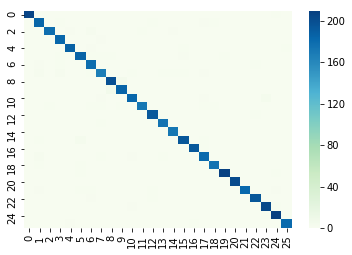

In [86]:
# 混淆矩阵的可视化
# 导入第三方模块
import seaborn as sns
import matplotlib.pyplot as plt
# 绘制热力图
sns.heatmap(cm, annot = False, fmt = '.2e',cmap = 'GnBu')
# 图形显示
plt.show()

# 预测问题
数据集来源于UCI网站，关于森林火灾方面的预测，该数据集一共包含517条火灾记录和13个变量，其中变量area为因变量，表示火灾产生的森林毁坏面积，其他变量主要包含火灾发生的坐标位置、时间、各项火险天气指标、气温、湿度、风力等信息。

In [32]:
# 读取外部数据
forestfires = pd.read_csv(r'.\forestfires.csv')
# 数据前5行
forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [33]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


火灾发生的时间（month，day）为字符型变量，如果将这样的变量代入模型中，就必须对其做数值化转换，考虑到月份可能是火灾发生的一个因素，保留。而将day变量删除。

In [34]:
pd.factorize(forestfires.month)

(array([ 0,  1,  1,  0,  0,  2,  2,  2,  3,  3,  3,  3,  2,  3,  3,  3,  0,
         1,  0,  4,  3,  3,  5,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  1,  1,  1,  0,  6,  2,  2,  3,  3,  3,  3,  6,  0,  0,  3,
         2,  2,  2,  2,  3,  3,  1,  7,  7,  0,  0,  2,  2,  2,  2,  3,  3,
         3,  0,  0,  3,  0,  2,  3,  7,  7,  0,  2,  2,  2,  2,  2,  2,  2,
         3,  3,  3,  3,  0,  2,  0,  2,  2,  2,  3,  7,  0,  2,  2,  2,  2,
         2,  3,  8,  0,  0,  2,  3,  3,  0,  0,  3,  3,  0,  0,  0,  0,  0,
         2,  2,  2,  3,  3,  3,  1,  0,  3,  1,  1,  7,  0,  0,  3,  0,  2,
         3,  3,  6,  3,  3,  2,  2,  6,  2,  2,  0,  3,  2,  3,  5,  6,  6,
         3,  3,  2,  3,  2,  2,  3,  0,  2,  0,  3,  3,  0,  2,  2,  0,  2,
         3,  2,  2,  3,  2,  2,  4,  2,  3,  2,  3,  1,  7,  1,  2,  3,  0,
         3,  0,  0,  0,  2,  2,  3,  2,  2,  4,  3,  3,  3,  3,  0,  7,  1,
         0,  3,  2,  3,  3,  3,  1,  2,  3,  0,  0,  0,  3,  3,  3,  0,  2,
         3, 

In [35]:
# 删除day变量
forestfires.drop('day',axis = 1, inplace = True)
# 将月份作数值化处理
forestfires.month = pd.factorize(forestfires.month)[0]
# 预览数据前5行
forestfires.head()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,1,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


area是因变量，是一个数值型变量，通常都需要对连续的因变量做分布的探索性分析时，如果出现严重的偏态，而不做任何的修正，直接代入模型会产生很差的结果。

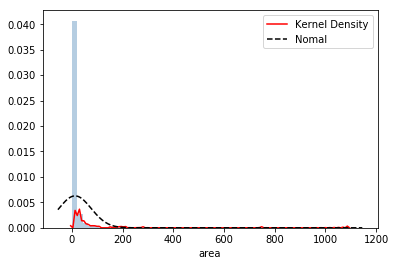

In [37]:
# 导入第三方模块
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
# 绘制森林烧毁面积的直方图
sns.distplot(forestfires.area, 
             bins = 50, 
             kde = True, # 绘制核密度图
             fit = norm, # 指定一个随机分布对象，用于绘制随机分布的概率密度曲线
             hist_kws = {'color':'steelblue'}, 
             kde_kws = {'color':'red', 'label':'Kernel Density'}, 
             fit_kws = {'color':'black','label':'Nomal', 'linestyle':'--'})
# 显示图例
plt.legend()
# 显示图形
plt.show()

从分布来看，数据呈现严重的右偏，建模时不能直接使用该变量，一般来说会将数据做对数处理。

在数据预处理时首先可以对偏度比较大的数据用log1p函数进行转化，使其更加服从高斯分布，此步处理可能会使我们后续的分类结果得到一个更好的结果；
平滑处理很容易被忽略掉，导致模型的结果总是达不到一定的标准，同样使用逼格更高的log1p能避免复值的问题——复值指一个自变量对应多个因变量

In [38]:
# 导入第三方模块
from sklearn import preprocessing
import numpy as np
# 对area变量作对数变换
y = np.log1p(forestfires.area)
# 将X变量作标准化处理
predictors = forestfires.columns[:-1]
X = preprocessing.scale(forestfires[predictors])

D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


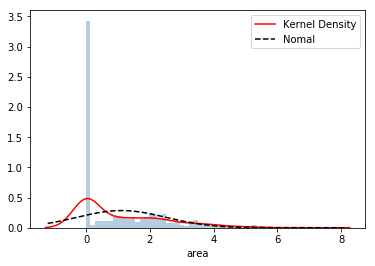

In [39]:
# 变换后
# 绘制森林烧毁面积的直方图
sns.distplot(y, 
             bins = 50, 
             kde = True,  
             fit = norm, 
             hist_kws = {'color':'steelblue'}, 
             kde_kws = {'color':'red', 'label':'Kernel Density'}, 
             fit_kws = {'color':'black','label':'Nomal', 'linestyle':'--'})
# 显示图例
plt.legend()
# 显示图形
plt.show()

In [40]:
# 将数据拆分为训练集和测试集
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,
                                                                 y, 
                                                                 test_size = 0.25,
                                                                 random_state = 1234)

In [43]:
# 构建默认参数的SVM回归模型
svr = SVR()
# 模型在训练数据集上的拟合
svr.fit(X_train,y_train)
# 模型在测试上的预测
pred_svr = svr.predict(X_test)
# 计算模型的MSE
metrics.mean_squared_error(y_test,pred_svr)

1.925863595333521

In [45]:
# 使用网格搜索法，选择SVM回归中的最佳C值、epsilon值和gamma值
epsilon = np.arange(0.1,1.5,0.2)
C= np.arange(100,1000,200)
gamma = np.arange(0.001,0.01,0.002)
parameters = {'epsilon':epsilon,'C':C,'gamma':gamma}
grid_svr = model_selection.GridSearchCV(estimator = SVR(),
                                        param_grid =parameters,
                                        scoring='neg_mean_squared_error',
                                        cv=5,
                                        verbose =1, 
                                        n_jobs=2)
# 模型在训练数据集上的拟合
grid_svr.fit(X_train,y_train)
# 返回交叉验证后的最佳参数值
print(grid_svr.best_params_, grid_svr.best_score_)

Fitting 5 folds for each of 175 candidates, totalling 875 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  73 tasks      | elapsed:    9.9s
[Parallel(n_jobs=2)]: Done 533 tasks      | elapsed:   37.1s


{'C': 300, 'epsilon': 1.1000000000000003, 'gamma': 0.001} -1.9940579497706303


[Parallel(n_jobs=2)]: Done 875 out of 875 | elapsed:  1.3min finished


In [46]:
# 模型在测试集上的预测
pred_grid_svr = grid_svr.predict(X_test)
# 计算模型在测试集上的MSE值
metrics.mean_squared_error(y_test,pred_grid_svr)

1.7455012238826595

可以看到不做任何调整的SVR模型在测试集上的MSE比经过参数的模型要高，因此有必要做参数调优。